<a href="https://colab.research.google.com/github/Carlos-Ruiz-Ed/Regresion_lineal/blob/main/Actividad4_(Regresi%C3%B3n_Lineal_Simple).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Actividad 4: Regresión Lineal Simple

Carlos Eduardo Ruiz Benavides

A01702749

##Importar librerias y subir el archivo

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from turtle import color


In [2]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

Saving DF_Mexico.csv to DF_Mexico.csv


In [3]:
#Cargar archivo csv
df = pd.read_csv('/content/DF_Mexico.csv', index_col=0)
df

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
2056638,https://www.airbnb.com/rooms/2056638,20230329041210,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,NaN,https://a0.muscache.com/pictures/28353712/4379...,10531228,https://www.airbnb.com/users/show/10531228,...,4.95,5.00,4.86,NaN,f,3,3,0,0,0.19
2072354,https://www.airbnb.com/rooms/2072354,20230329041210,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,16840050,https://www.airbnb.com/users/show/16840050,...,5.00,4.95,4.84,NaN,f,2,2,0,0,0.54
696037,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,https://www.airbnb.com/users/show/3531879,...,4.92,4.58,4.71,NaN,f,3,3,0,0,0.31
35797,https://www.airbnb.com/rooms/35797,20230329041210,2023-03-29,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,https://www.airbnb.com/users/show/153786,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
44616,https://www.airbnb.com/rooms/44616,20230329041210,2023-03-30,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,https://www.airbnb.com/users/show/196253,...,4.78,4.98,4.48,NaN,f,12,3,2,0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853923589855678923,https://www.airbnb.com/rooms/853923589855678923,20230329041210,2023-03-30,city scrape,Rincón Mexico lindo!,Este lugar tiene una ubicación estratégica: ll...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,488030249,https://www.airbnb.com/users/show/488030249,...,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN
853966732274073000,https://www.airbnb.com/rooms/853966732274073000,20230329041210,2023-03-29,city scrape,Departamento en zona diamante.,"Ubicado en zona diamante, junto al aeropuerto,...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,506816029,https://www.airbnb.com/users/show/506816029,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
854225071295768399,https://www.airbnb.com/rooms/854225071295768399,20230329041210,2023-03-29,city scrape,Habitación privada en magnífica casa,Relájate en este espacio muy tranquilo y elega...,NaN,https://a0.muscache.com/pictures/db71951a-8696...,154670560,https://www.airbnb.com/users/show/154670560,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24224 entries, 2056638 to 854260329845513725
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   24224 non-null  object 
 1   scrape_id                                     24224 non-null  int64  
 2   last_scraped                                  24224 non-null  object 
 3   source                                        24224 non-null  object 
 4   name                                          24223 non-null  object 
 5   description                                   23296 non-null  object 
 6   neighborhood_overview                         15145 non-null  object 
 7   picture_url                                   24224 non-null  object 
 8   host_id                                       24224 non-null  int64  
 9   host_url                                  

##Limpieza de valores nulos y atípicos

###Nulos

In [57]:
#Eliminamos las columnas completamente vacias y los id que no pudieran ser utiles para un modelo
df1 = df[['host_response_rate', 'host_acceptance_rate',
          'host_is_superhost', 'host_identity_verified','property_type',
          'room_type', 'accommodates','bathrooms_text','bedrooms',
          'beds', 'price', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
          'availability_30', 'availability_60', 'availability_90', 'availability_365',
          'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
          'review_scores_rating', 'review_scores_accuracy', 'review_scores_checkin',
          'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location',
          'review_scores_value', 'reviews_per_month'
          ]]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24224 entries, 2056638 to 854260329845513725
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_rate           21133 non-null  object 
 1   host_acceptance_rate         22181 non-null  object 
 2   host_is_superhost            24219 non-null  object 
 3   host_identity_verified       24224 non-null  object 
 4   property_type                24224 non-null  object 
 5   room_type                    24224 non-null  object 
 6   accommodates                 24224 non-null  int64  
 7   bathrooms_text               24194 non-null  object 
 8   bedrooms                     23669 non-null  float64
 9   beds                         23953 non-null  float64
 10  price                        24224 non-null  object 
 11  minimum_nights_avg_ntm       24223 non-null  float64
 12  maximum_nights_avg_ntm       24223 non-null  float64
 1

In [7]:
#Convertir DataFrame a CSV
df1.to_csv("Columnas_relevantes.csv")

#descargar archivo filtrado en csv
from google.colab import files


files.download("Columnas_relevantes.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
nulos = df1.isnull().sum()
nulos

host_response_rate             3091
host_acceptance_rate           2043
host_is_superhost                 5
host_identity_verified            0
property_type                     0
room_type                         0
accommodates                      0
bathrooms_text                   30
bedrooms                        555
beds                            271
price                             0
minimum_nights_avg_ntm            1
maximum_nights_avg_ntm            1
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
number_of_reviews_ltm             0
number_of_reviews_l30d            0
review_scores_rating           3596
review_scores_accuracy         3652
review_scores_checkin          3652
review_scores_cleanliness      3651
review_scores_communication    3652
review_scores_location         3653
review_scores_value            3653
reviews_per_month           

In [58]:
df1['host_response_rate'] = df1['host_response_rate'].str.replace('%', '').astype('float') / 100.0
df1['host_acceptance_rate'] = df1['host_acceptance_rate'].str.replace('%', '').astype('float') / 100.0



<ipython-input-58-ae245cf235a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['host_response_rate'] = df1['host_response_rate'].str.replace('%', '').astype('float') / 100.0
<ipython-input-58-ae245cf235a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['host_acceptance_rate'] = df1['host_acceptance_rate'].str.replace('%', '').astype('float') / 100.0


In [59]:
df1['bathrooms_text'] = df1['bathrooms_text'].str.extract('(\d+)')

<ipython-input-59-c062303d1ff0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['bathrooms_text'] = df1['bathrooms_text'].str.extract('(\d+)')


In [60]:
df1['bathrooms_text'] = df1['bathrooms_text'].astype('float')

<ipython-input-60-24410c883b64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['bathrooms_text'] = df1['bathrooms_text'].astype('float')


In [61]:
df1['price'] = df1['price'].str.replace('$', '').str.replace(',', '').astype('float')

<ipython-input-61-4bbf459c756b>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['price'] = df1['price'].str.replace('$', '').str.replace(',', '').astype('float')
<ipython-input-61-4bbf459c756b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price'] = df1['price'].str.replace('$', '').str.replace(',', '').astype('float')


In [63]:
df1['host_is_superhost'] = df1['host_is_superhost'].map({'f': 0, 't': 1})
df1['host_identity_verified'] = df1['host_identity_verified'].map({'f': 0, 't': 1})

<ipython-input-63-63abcfb3f645>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['host_is_superhost'] = df1['host_is_superhost'].map({'f': 0, 't': 1})
<ipython-input-63-63abcfb3f645>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['host_identity_verified'] = df1['host_identity_verified'].map({'f': 0, 't': 1})


In [65]:
df1 = df1.fillna(round(df1.mean(),2))
df1 =df1.fillna(method="ffill")
df1 =df1.fillna(method="bfill")
df

<ipython-input-65-a01b849a2f67>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1 = df1.fillna(round(df1.mean(),2))


,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
2056638,https://www.airbnb.com/rooms/2056638,20230329041210,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,NaN,https://a0.muscache.com/pictures/28353712/4379...,10531228,https://www.airbnb.com/users/show/10531228,...,4.95,5.00,4.86,NaN,f,3,3,0,0,0.19
2072354,https://www.airbnb.com/rooms/2072354,20230329041210,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,16840050,https://www.airbnb.com/users/show/16840050,...,5.00,4.95,4.84,NaN,f,2,2,0,0,0.54
696037,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,https://www.airbnb.com/users/show/3531879,...,4.92,4.58,4.71,NaN,f,3,3,0,0,0.31
35797,https://www.airbnb.com/rooms/35797,20230329041210,2023-03-29,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,https://www.airbnb.com/users/show/153786,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
44616,https://www.airbnb.com/rooms/44616,20230329041210,2023-03-30,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,https://www.airbnb.com/users/show/196253,...,4.78,4.98,4.48,NaN,f,12,3,2,0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853923589855678923,https://www.airbnb.com/rooms/853923589855678923,20230329041210,2023-03-30,city scrape,Rincón Mexico lindo!,Este lugar tiene una ubicación estratégica: ll...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,488030249,https://www.airbnb.com/users/show/488030249,...,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN
853966732274073000,https://www.airbnb.com/rooms/853966732274073000,20230329041210,2023-03-29,city scrape,Departamento en zona diamante.,"Ubicado en zona diamante, junto al aeropuerto,...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,506816029,https://www.airbnb.com/users/show/506816029,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
854225071295768399,https://www.airbnb.com/rooms/854225071295768399,20230329041210,2023-03-29,city scrape,Habitación privada en magnífica casa,Relájate en este espacio muy tranquilo y elega...,NaN,https://a0.muscache.com/pictures/db71951a-8696...,154670560,https://www.airbnb.com/users/show/154670560,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN


In [66]:
nulos = df1.isnull().sum()
nulos

host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
host_identity_verified         0
property_type                  0
room_type                      0
accommodates                   0
bathrooms_text                 0
bedrooms                       0
beds                           0
price                          0
minimum_nights_avg_ntm         0
maximum_nights_avg_ntm         0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
number_of_reviews_ltm          0
number_of_reviews_l30d         0
review_scores_rating           0
review_scores_accuracy         0
review_scores_checkin          0
review_scores_cleanliness      0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
dtype: int64

###Atípicos

<Figure size 1500x800 with 0 Axes>

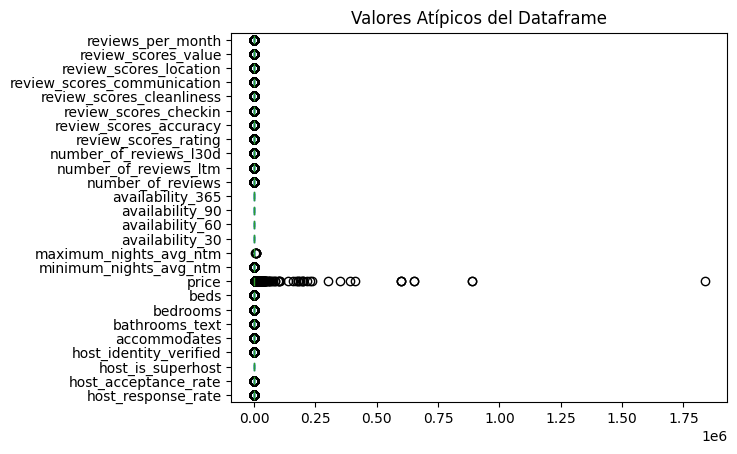

In [68]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
df1.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

In [69]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y = df1
Limite_Superior = y.mean() + 3*y.std()
Limite_Inferior = y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

<ipython-input-69-e47e17d41e2e>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior = y.mean() + 3*y.std()
<ipython-input-69-e47e17d41e2e>:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior = y.mean() + 3*y.std()


Limite superior permitido host_response_rate                 1.455437
host_acceptance_rate               1.511469
host_is_superhost                  1.805590
host_identity_verified             1.731645
accommodates                       9.933140
bathrooms_text                     4.160115
bedrooms                           4.971494
beds                               6.933827
price                          56493.738888
minimum_nights_avg_ntm            74.890171
maximum_nights_avg_ntm          2159.176276
availability_30                   49.824183
availability_60                  101.327447
availability_90                  152.257190
availability_365                 617.302497
number_of_reviews                226.110805
number_of_reviews_ltm             74.249659
number_of_reviews_l30d             6.890766
review_scores_rating               6.156870
review_scores_accuracy             6.018688
review_scores_checkin              5.961060
review_scores_cleanliness          6.001013
review

<ipython-input-69-e47e17d41e2e>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Inferior = y.mean() - 3*y.std()
<ipython-input-69-e47e17d41e2e>:4: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Inferior = y.mean() - 3*y.std()


In [72]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
data2 = df1[(y<=Limite_Superior)&(y>=Limite_Inferior)]

<ipython-input-72-637120699059>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data2 = df1[(y<=Limite_Superior)&(y>=Limite_Inferior)]


In [73]:
data3= data2.drop(['property_type', 'room_type' ], axis=1)

In [74]:
data_clean1 = data3.copy()
data_clean1 = data_clean1.fillna(round(data3.mean(),1))

In [76]:
# Unimos la columnas que quitamos con el dataframe
columnas_eliminadas = df1[['property_type',"room_type"]]

df2 = pd.concat([columnas_eliminadas, data_clean1], axis=1)
df2

,property_type,room_type,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,accommodates,bathrooms_text,bedrooms,beds,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
2056638,Entire loft,Entire home/apt,1.00,0.91,0.0,1.0,3.0,1.0,1.0,1.0,...,0.0,0.0,4.95,4.71,5.00,4.95,4.95,5.00,4.86,0.19
2072354,Entire guest suite,Entire home/apt,0.95,0.91,0.0,1.0,2.0,1.0,1.0,1.0,...,1.0,0.0,4.85,4.90,4.93,4.88,5.00,4.95,4.84,0.54
696037,Entire rental unit,Entire home/apt,1.00,0.90,1.0,1.0,6.0,2.0,3.0,3.0,...,2.0,0.0,4.57,4.82,4.92,4.71,4.92,4.58,4.71,0.31
35797,Entire villa,Entire home/apt,0.95,0.91,0.0,1.0,2.0,1.0,1.0,1.0,...,0.0,0.0,4.72,4.78,4.83,4.75,4.82,4.83,4.71,1.70
44616,Entire home,Entire home/apt,1.00,0.86,0.0,1.0,3.1,1.3,1.5,1.8,...,12.0,1.0,4.58,4.56,4.87,4.70,4.78,4.98,4.48,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853923589855678923,Entire rental unit,Entire home/apt,1.00,1.00,0.0,1.0,2.0,1.0,1.0,1.0,...,0.0,0.0,4.72,4.78,4.83,4.75,4.82,4.83,4.71,1.70
853966732274073000,Entire rental unit,Entire home/apt,0.95,0.91,0.0,1.0,7.0,1.0,2.0,3.0,...,0.0,0.0,4.72,4.78,4.83,4.75,4.82,4.83,4.71,1.70
854225071295768399,Private room in home,Private room,0.95,0.96,0.0,1.0,2.0,2.0,2.0,1.0,...,0.0,0.0,4.72,4.78,4.83,4.75,4.82,4.83,4.71,1.70


In [78]:
#Convertir DataFrame a CSV
df2.to_csv("DF_MexicoLimpio.csv")

#descargar archivo filtrado en csv
from google.colab import files


files.download("DF_MexicoLimpio.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Crear dataframes para los dos tipos de habitacion

In [197]:
df2['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

##Private rooms

In [412]:
determinacion = []
correlacion = []

In [413]:
habitaciones = df2.groupby('room_type')

df_privadas = habitaciones.get_group('Private room')

df_privadas

,property_type,room_type,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,accommodates,bathrooms_text,bedrooms,beds,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
61792,Private room in home,Private room,1.00,1.00,1.0,1.0,2.0,1.0,1.0,1.0,...,6.0,0.0,4.92,4.89,4.92,4.90,4.95,4.94,4.87,0.94
760912,Private room in rental unit,Private room,0.95,0.90,0.0,1.0,2.0,1.0,1.0,1.0,...,0.0,0.0,4.75,4.60,5.00,4.20,4.60,4.80,4.60,0.04
2088218,Private room in home,Private room,1.00,0.91,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,4.40,5.00,5.00,4.60,4.80,4.40,4.40,0.04
2093036,Private room in rental unit,Private room,0.95,0.90,0.0,1.0,2.0,1.0,1.0,2.0,...,0.0,0.0,4.72,4.78,4.83,4.75,4.82,4.83,4.71,1.70
131610,Private room,Private room,1.00,0.91,0.0,1.0,2.0,1.0,1.0,1.0,...,0.0,0.0,4.72,4.78,4.83,4.75,4.82,4.83,4.71,1.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856473895554110501,Private room in rental unit,Private room,0.95,0.91,0.0,1.0,4.0,1.0,1.0,2.0,...,0.0,0.0,4.72,4.78,4.83,4.75,4.82,4.83,4.71,1.70
853707681690048732,Private room in rental unit,Private room,0.95,0.91,0.0,1.0,2.0,1.0,2.0,3.0,...,0.0,0.0,4.72,4.78,4.83,4.75,4.82,4.83,4.71,1.70
853746847434924262,Private room in rental unit,Private room,1.00,1.00,0.0,1.0,2.0,1.0,1.0,1.0,...,0.0,0.0,4.72,4.78,4.83,4.75,4.82,4.83,4.71,1.70


In [414]:
#Convertir DataFrame a CSV
df_privadas.to_csv("Habitaciones_privadas.csv")

#descargar archivo filtrado en csv
from google.colab import files


files.download("Habitaciones_privadas.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

####host_acceptance_rate vs host_response_rate

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

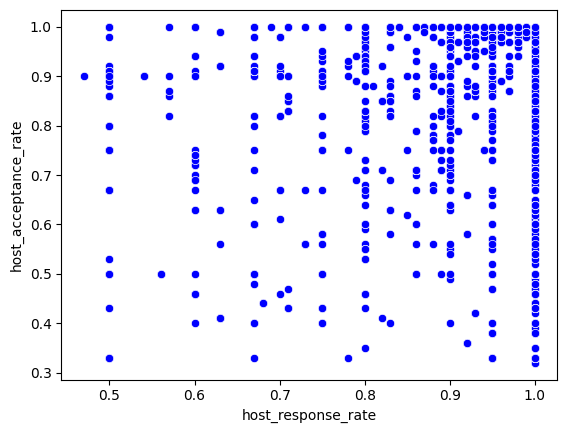

In [415]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión

sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=df_privadas)

In [416]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_privadas[['host_response_rate']]
Var_Dep= df_privadas['host_acceptance_rate']

In [417]:
#Se define model como la función de regresión lineal
model= LinearRegression()

In [418]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [419]:
#Predecimos los valores
y_pred= model.predict(X=df_privadas[['host_response_rate']])

In [420]:
#Insertamos la columna de predicciones en el DataFrame
df_privadas.insert(0, 'Predicciones_1', y_pred)

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

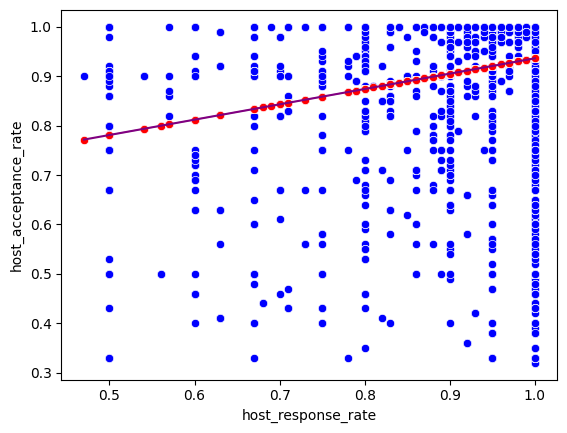

In [421]:
#Visualizamos la gráfica comparativa entre el real y el predecido

sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=df_privadas)
sns.scatterplot(x='host_response_rate', y='Predicciones_1', color="red", data=df_privadas)
sns.lineplot(x='host_response_rate', y='Predicciones_1', color="purple", data=df_privadas)

In [422]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
determinacion.append(coef_Deter)
coef_Deter

0.04056594662060309

In [423]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
correlacion.append(coef_Correl)
coef_Correl

0.20140989702743778

####host_acceptance_rate vs price

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

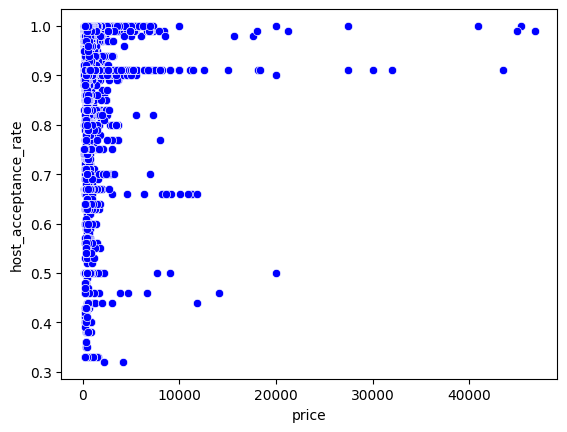

In [424]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión

sns.scatterplot(x='price', y='host_acceptance_rate', color="blue", data=df_privadas)

In [425]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_privadas[['price']]
Var_Dep= df_privadas['host_acceptance_rate']

In [426]:
#Se define model como la función de regresión lineal
model= LinearRegression()

In [427]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [428]:
#Predecimos los valores
y_pred= model.predict(X=df_privadas[['price']])

In [429]:
#Insertamos la columna de predicciones en el DataFrame
df_privadas.insert(0, 'Predicciones_2', y_pred)

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

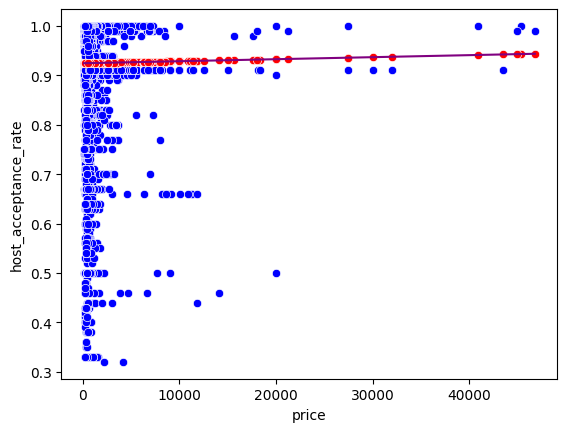

In [430]:
#Visualizamos la gráfica comparativa entre el real y el predecido

sns.scatterplot(x='price', y='host_acceptance_rate', color="blue", data=df_privadas)
sns.scatterplot(x='price', y='Predicciones_2', color="red", data=df_privadas)
sns.lineplot(x='price', y='Predicciones_2', color="purple", data=df_privadas)

In [431]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
determinacion.append(coef_Deter)
coef_Deter

3.18708930603373e-05

In [432]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
correlacion.append(coef_Correl)
coef_Correl

0.005645431166911638

####host_acceptance_rate vs number_of_reviews

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

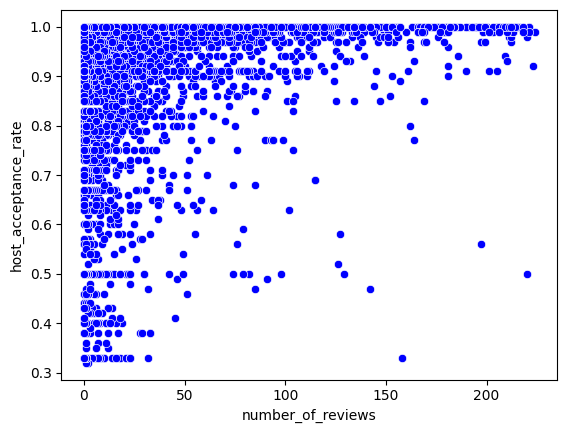

In [433]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=df_privadas)

In [434]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_privadas[['number_of_reviews']]
Var_Dep= df_privadas['host_acceptance_rate']

In [435]:
#Se define model como la función de regresión lineal
model= LinearRegression()

In [436]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [437]:
#Predecimos los valores
y_pred= model.predict(X=df_privadas[['number_of_reviews']])

In [438]:
#Insertamos la columna de predicciones en el DataFrame
df_privadas.insert(0, 'Predicciones_3', y_pred)

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

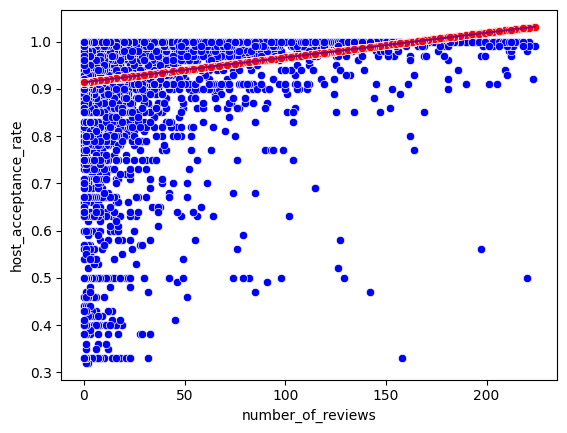

In [439]:
#Visualizamos la gráfica comparativa entre el total y el predecido

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=df_privadas)
sns.scatterplot(x='number_of_reviews', y='Predicciones_3', color="red", data=df_privadas)
sns.lineplot(x='number_of_reviews', y='Predicciones_3', color="purple", data=df_privadas)

In [440]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
determinacion.append(coef_Deter)
coef_Deter

0.022421049385783598

In [441]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
correlacion.append(coef_Correl)
coef_Correl

0.14973660002078182

####review_scores_location vs review_scores_cleanlines

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

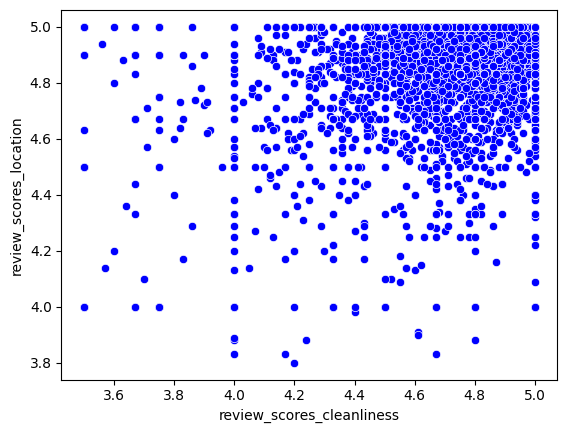

In [442]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión

sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="blue", data=df_privadas)

In [443]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_privadas[['review_scores_cleanliness']]
Var_Dep= df_privadas['review_scores_location']

In [444]:
#Se define model como la función de regresión lineal
model= LinearRegression()

In [445]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [446]:
#Predecimos los valores
y_pred= model.predict(X=df_privadas[['review_scores_cleanliness']])

In [447]:
#Insertamos la columna de predicciones en el DataFrame
df_privadas.insert(0, 'Predicciones_4', y_pred)

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

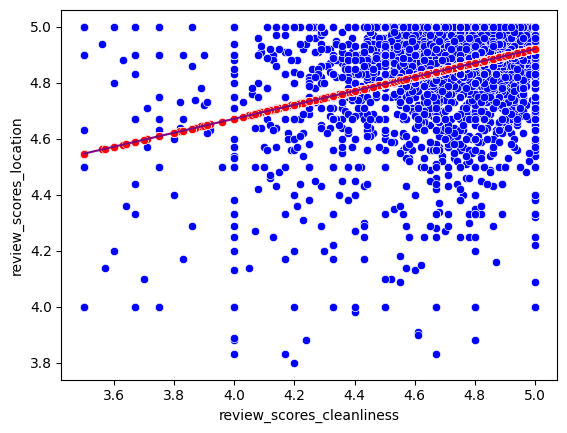

In [448]:
#Visualizamos la gráfica comparativa entre el real y el predecido

sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="blue", data=df_privadas)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones_4', color="red", data=df_privadas)
sns.lineplot(x='review_scores_cleanliness', y='Predicciones_4', color="purple", data=df_privadas)

In [449]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
determinacion.append(coef_Deter)
coef_Deter

0.11415375523267646

In [450]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
correlacion.append(coef_Correl)
coef_Correl

0.33786647544951315

####availability_365 vs number_of_reviews

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

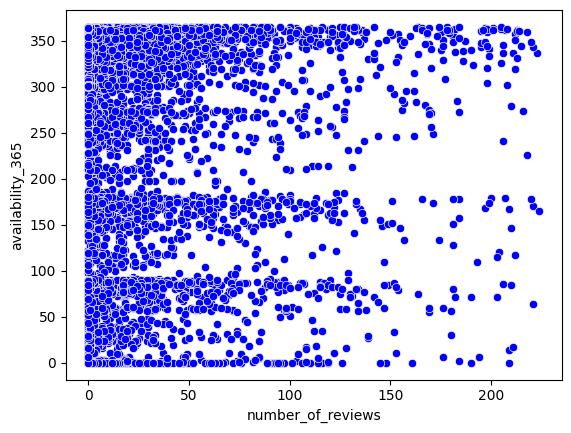

In [451]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión

sns.scatterplot(x='number_of_reviews', y='availability_365', color="blue", data=df_privadas)

In [452]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_privadas[['number_of_reviews']]
Var_Dep= df_privadas['availability_365']

In [453]:
#Se define model como la función de regresión lineal
model= LinearRegression()

In [454]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [455]:
#Predecimos los valores
y_pred= model.predict(X=df_privadas[['number_of_reviews']])

In [456]:
#Insertamos la columna de predicciones en el DataFrame
df_privadas.insert(0, 'Predicciones_5', y_pred)

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

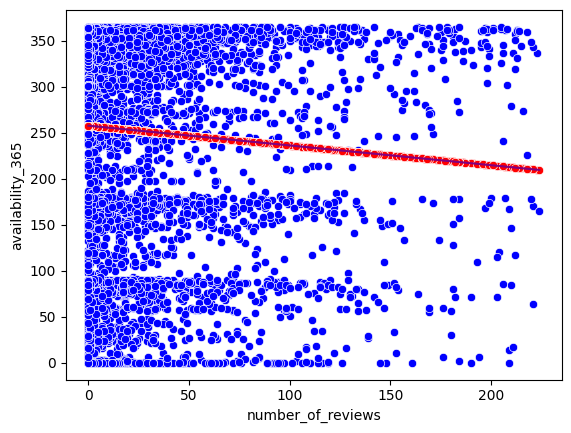

In [457]:
#Visualizamos la gráfica comparativa entre el real y el predecido

sns.scatterplot(x='number_of_reviews', y='availability_365', color="blue", data=df_privadas)
sns.scatterplot(x='number_of_reviews', y='Predicciones_5', color="red", data=df_privadas)
sns.lineplot(x='number_of_reviews', y='Predicciones_5', color="purple", data=df_privadas)

In [458]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
determinacion.append(coef_Deter)
coef_Deter

0.0037244137161634994

In [459]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
correlacion.append(coef_Correl)
coef_Correl

0.06102797486533122

####reviews_per_month vs review_scores_communication

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

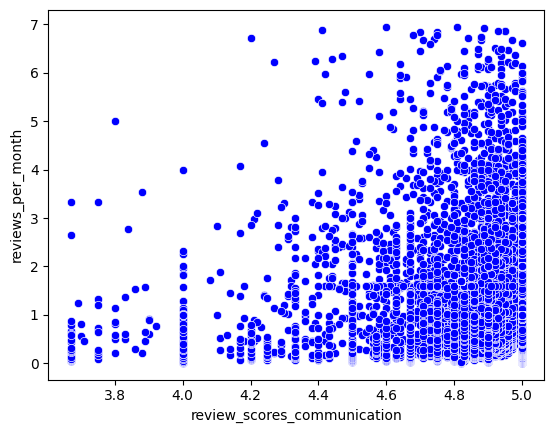

In [460]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión

sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="blue", data=df_privadas)

In [461]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_privadas[['review_scores_communication']]
Var_Dep= df_privadas['reviews_per_month']

In [462]:
#Se define model como la función de regresión lineal
model= LinearRegression()

In [463]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [464]:
#Predecimos los valores
y_pred= model.predict(X=df_privadas[['review_scores_communication']])

In [465]:
#Insertamos la columna de predicciones en el DataFrame
df_privadas.insert(0, 'Predicciones_6', y_pred)

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

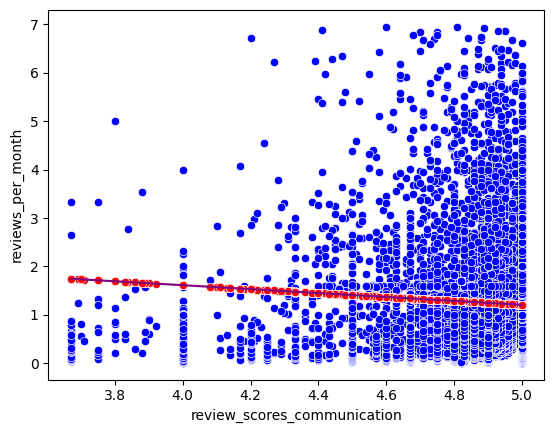

In [466]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="blue", data=df_privadas)
sns.scatterplot(x='review_scores_communication', y='Predicciones_6', color="red", data=df_privadas)
sns.lineplot(x='review_scores_communication', y='Predicciones_6', color="purple", data=df_privadas)

In [467]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
determinacion.append(coef_Deter)
coef_Deter

0.005092474963216076

In [468]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
correlacion.append(coef_Correl)
coef_Correl

0.07136157904093825

###Modelo matematico para numero de reseñas

In [469]:
# Calcular la matriz de correlación
correlation_matrix = df_privadas.corrwith(df_privadas['number_of_reviews'])

# Imprimir la matriz de correlación
print(correlation_matrix)

Predicciones_6                -0.025407
Predicciones_5                -1.000000
Predicciones_4                 0.031635
Predicciones_3                 1.000000
Predicciones_2                -0.077522
Predicciones_1                 0.084996
host_response_rate             0.084996
host_acceptance_rate           0.149737
host_is_superhost              0.240678
host_identity_verified              NaN
accommodates                   0.033296
bathrooms_text                -0.042183
bedrooms                      -0.098544
beds                          -0.057297
price                         -0.077522
minimum_nights_avg_ntm        -0.112749
maximum_nights_avg_ntm         0.168133
availability_30               -0.095535
availability_60               -0.063806
availability_90               -0.044627
availability_365              -0.061028
number_of_reviews              1.000000
number_of_reviews_ltm          0.638141
number_of_reviews_l30d         0.403304
review_scores_rating           0.035348


<ipython-input-469-f6c3a9fc89c6>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_privadas.corrwith(df_privadas['number_of_reviews'])


####number_of_reviews vs number_of_reviews_ltm

<Axes: xlabel='number_of_reviews_ltm', ylabel='number_of_reviews'>

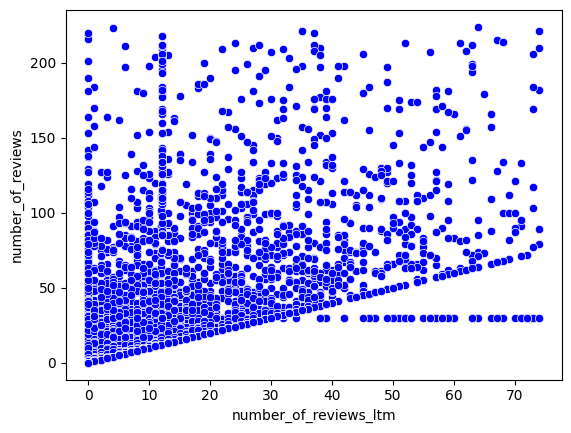

In [470]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión

sns.scatterplot(x='number_of_reviews_ltm', y='number_of_reviews', color="blue", data=df_privadas)

In [471]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_privadas[['number_of_reviews_ltm']]
Var_Dep= df_privadas['number_of_reviews']

In [472]:
#Se define model como la función de regresión lineal
model= LinearRegression()

In [473]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [474]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_ltm'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.74434234]),
 'rank_': 1,
 'singular_': array([1179.8121612]),
 'intercept_': 7.33241242771482}

**MODELO : y = 1.74434234x + 7.33241242771482**

In [475]:
#Predecimos los valores
y_pred= model.predict(X=df_privadas[['number_of_reviews_ltm']])

In [476]:
#Insertamos la columna de predicciones en el DataFrame
df_privadas.insert(0, 'Predicciones_7', y_pred)

<Axes: xlabel='number_of_reviews_ltm', ylabel='number_of_reviews'>

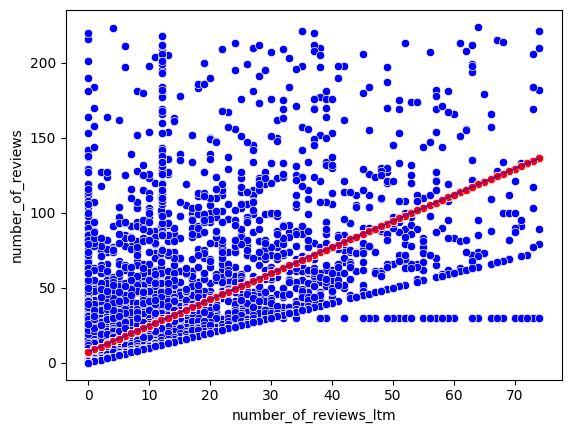

In [477]:
#Visualizamos la gráfica comparativa entre el real y el predecido

sns.scatterplot(x='number_of_reviews_ltm', y='number_of_reviews', color="blue", data=df_privadas)
sns.scatterplot(x='number_of_reviews_ltm', y='Predicciones_7', color="red", data=df_privadas)
sns.lineplot(x='number_of_reviews_ltm', y='Predicciones_7', color="purple", data=df_privadas)

In [478]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
determinacion.append(coef_Deter)
coef_Deter

0.4072244431323586

In [479]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
correlacion.append(coef_Correl)
coef_Correl

0.6381413974444524

###Tablas de determinacion y correlacion

In [480]:
variables = ['host_acceptance_rate vs host_response_rate',
                       'host_acceptance_rate vs price'
                       ,'host_acceptance_rate vs number_of_reviews'
                       ,'review_scores_location vs review_scores_cleanliness'
                       ,'availability_365 vs number_of_reviews'
                       ,'reviews_per_month vs review_scores_communication'
                       ,'number_of_reviews vs number_of_reviews_ltm']
modelo = pd.Series(variables)
correl = pd.Series(correlacion)
deter = pd.Series(determinacion)

In [481]:
coef = pd.DataFrame({'Modelo': modelo, 'Determinacion': deter, 'Correlacion': correl})
coef

,Modelo,Determinacion,Correlacion
0,host_acceptance_rate vs host_response_rate,0.040566,0.201410
1,host_acceptance_rate vs price,0.000032,0.005645
2,host_acceptance_rate vs number_of_reviews,0.022421,0.149737
3,review_scores_location vs review_scores_cleanl...,0.114154,0.337866
4,availability_365 vs number_of_reviews,0.003724,0.061028
5,reviews_per_month vs review_scores_communication,0.005092,0.071362
6,number_of_reviews vs number_of_reviews_ltm,0.407224,0.638141


In [482]:
#Convertir DataFrame a CSV
coef.to_csv("Habitaciones_privadas_coeficientes.csv")

#descargar archivo filtrado en csv
from google.colab import files


files.download("Habitaciones_privadas_coeficientes.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Hotel rooms

In [487]:
determinacion = []
correlacion = []

In [488]:
df_hotel = habitaciones.get_group('Hotel room')

df_hotel

,property_type,room_type,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,accommodates,bathrooms_text,bedrooms,beds,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
737328,Room in serviced apartment,Hotel room,0.90,0.87,1.00,1.0,2.0,1.00,1.00,1.00,...,0.0,0.0,4.83,4.87,5.00,4.83,5.00,4.83,4.78,0.18
865012,Room in serviced apartment,Hotel room,0.90,0.87,1.00,1.0,2.0,1.00,1.00,1.00,...,0.0,0.0,4.97,4.97,5.00,4.94,5.00,4.97,4.97,0.25
868843,Room in serviced apartment,Hotel room,0.90,0.87,1.00,1.0,2.0,1.00,1.00,1.00,...,9.0,1.0,4.98,4.98,5.00,4.92,5.00,5.00,4.90,0.46
869063,Room in serviced apartment,Hotel room,0.90,0.87,1.00,1.0,2.0,1.00,1.00,1.00,...,3.0,0.0,4.95,5.00,5.00,4.95,5.00,4.95,4.95,0.25
281134,Room in serviced apartment,Hotel room,1.00,0.86,0.00,1.0,3.0,1.00,1.00,2.00,...,0.0,0.0,4.71,4.71,5.00,5.00,5.00,5.00,4.86,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43205383,Room in hotel,Hotel room,1.00,1.00,0.36,1.0,0.0,1.39,1.55,1.96,...,2.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.12
43247503,Room in hotel,Hotel room,0.95,0.91,0.36,1.0,0.0,1.39,1.55,1.96,...,0.0,0.0,4.72,4.78,4.83,4.75,4.82,4.83,4.71,1.70
43247525,Room in hotel,Hotel room,0.95,1.00,0.36,1.0,0.0,1.39,1.55,1.96,...,0.0,0.0,4.72,4.78,4.83,4.75,4.82,4.83,4.71,1.70


In [489]:
#Convertir DataFrame a CSV
df_hotel.to_csv("Habitaciones_hotel.csv")

#descargar archivo filtrado en csv
from google.colab import files


files.download("Habitaciones_hotel.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

####host_acceptance_rate vs host_response_rate

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

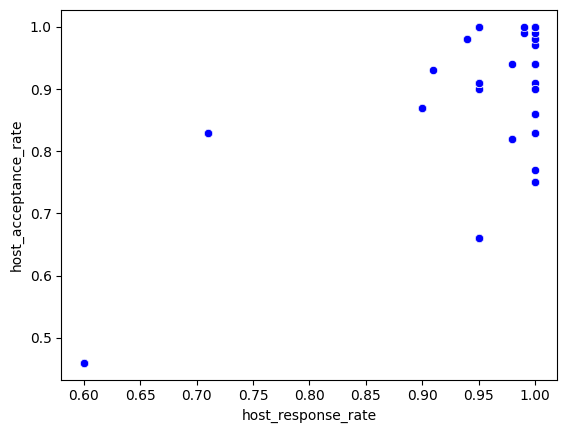

In [490]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión

sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=df_hotel)

In [491]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_hotel[['host_response_rate']]
Var_Dep= df_hotel['host_acceptance_rate']

In [492]:
#Se define model como la función de regresión lineal
model= LinearRegression()

In [493]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [494]:
#Predecimos los valores
y_pred= model.predict(X=df_hotel[['host_response_rate']])

In [495]:
#Insertamos la columna de predicciones en el DataFrame
df_hotel.insert(0, 'Predicciones_1', y_pred)

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

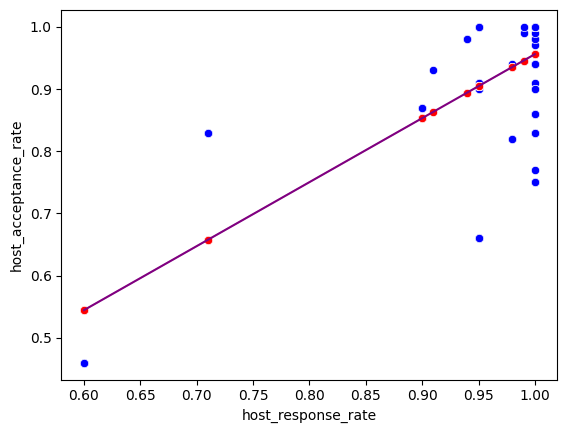

In [496]:
#Visualizamos la gráfica comparativa entre el real y el predecido

sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=df_hotel)
sns.scatterplot(x='host_response_rate', y='Predicciones_1', color="red", data=df_hotel)
sns.lineplot(x='host_response_rate', y='Predicciones_1', color="purple", data=df_hotel)

In [497]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
determinacion.append(coef_Deter)
coef_Deter

0.4864277365960322

In [498]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
correlacion.append(coef_Correl)
coef_Correl

0.6974437157190767

####host_acceptance_rate vs price

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

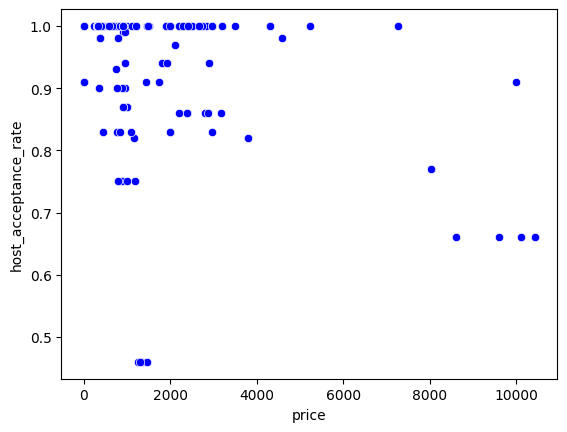

In [499]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión

sns.scatterplot(x='price', y='host_acceptance_rate', color="blue", data=df_hotel)

In [500]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_hotel[['price']]
Var_Dep= df_hotel['host_acceptance_rate']

In [501]:
#Se define model como la función de regresión lineal
model= LinearRegression()

In [502]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [503]:
#Predecimos los valores
y_pred= model.predict(X=df_hotel[['price']])

In [504]:
#Insertamos la columna de predicciones en el DataFrame
df_hotel.insert(0, 'Predicciones_2', y_pred)

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

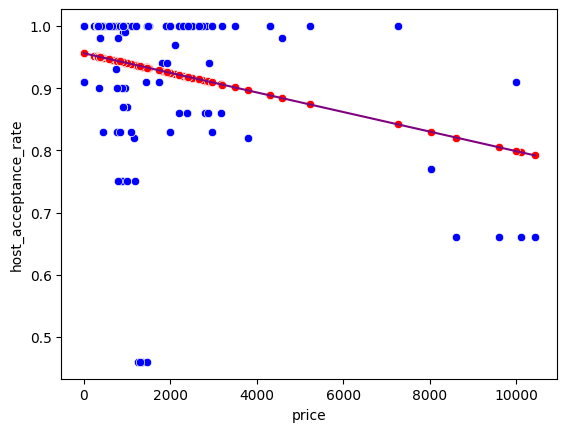

In [505]:
#Visualizamos la gráfica comparativa entre el real y el predecido

sns.scatterplot(x='price', y='host_acceptance_rate', color="blue", data=df_hotel)
sns.scatterplot(x='price', y='Predicciones_2', color="red", data=df_hotel)
sns.lineplot(x='price', y='Predicciones_2', color="purple", data=df_hotel)

In [506]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
determinacion.append(coef_Deter)
coef_Deter

0.06997894296351037

In [507]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
correlacion.append(coef_Correl)
coef_Correl

0.26453533405484864

####host_acceptance_rate vs number_of_reviews

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

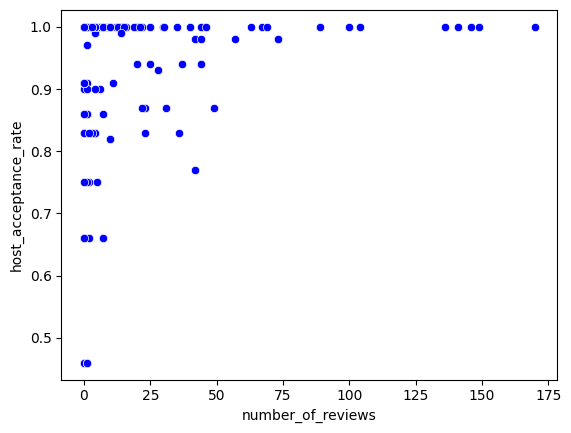

In [508]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=df_hotel)

In [509]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_hotel[['number_of_reviews']]
Var_Dep= df_hotel['host_acceptance_rate']

In [510]:
#Se define model como la función de regresión lineal
model= LinearRegression()

In [511]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [512]:
#Predecimos los valores
y_pred= model.predict(X=df_hotel[['number_of_reviews']])

In [513]:
#Insertamos la columna de predicciones en el DataFrame
df_hotel.insert(0, 'Predicciones_3', y_pred)

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

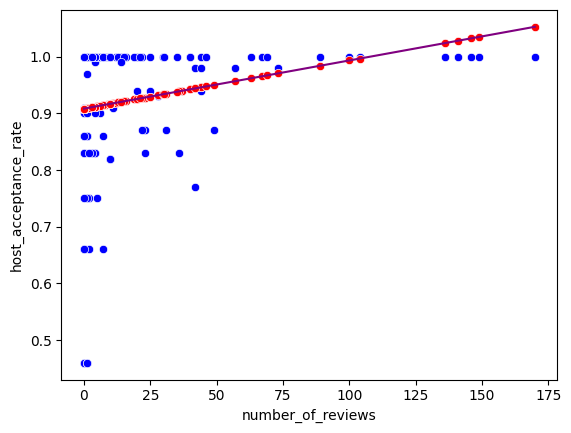

In [514]:
#Visualizamos la gráfica comparativa entre el real y el predecido

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=df_hotel)
sns.scatterplot(x='number_of_reviews', y='Predicciones_3', color="red", data=df_hotel)
sns.lineplot(x='number_of_reviews', y='Predicciones_3', color="purple", data=df_hotel)

In [515]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
determinacion.append(coef_Deter)
coef_Deter

0.054947185450653135

In [516]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
correlacion.append(coef_Correl)
coef_Correl

0.2344081599489513

####review_scores_location vs review_scores_cleanlines

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

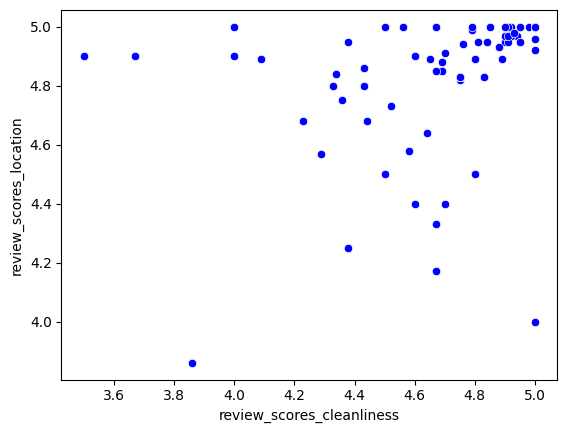

In [517]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión

sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="blue", data=df_hotel)

In [518]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_hotel[['review_scores_cleanliness']]
Var_Dep= df_hotel['review_scores_location']

In [519]:
#Se define model como la función de regresión lineal
model= LinearRegression()

In [520]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [521]:
#Predecimos los valores
y_pred= model.predict(X=df_hotel[['review_scores_cleanliness']])

In [522]:
#Insertamos la columna de predicciones en el DataFrame
df_hotel.insert(0, 'Predicciones_4', y_pred)

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

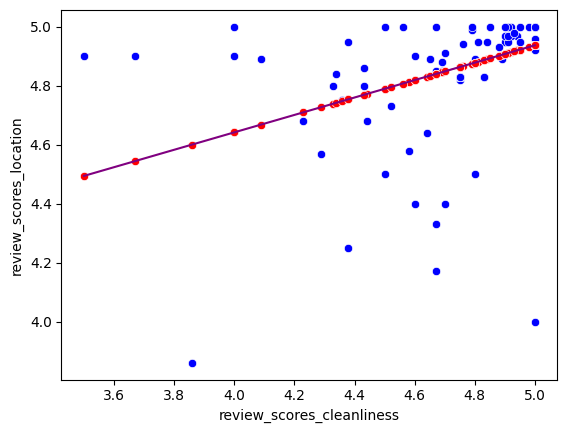

In [523]:
#Visualizamos la gráfica comparativa entre el real y el predecido

sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="blue", data=df_hotel)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones_4', color="red", data=df_hotel)
sns.lineplot(x='review_scores_cleanliness', y='Predicciones_4', color="purple", data=df_hotel)

In [524]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
determinacion.append(coef_Deter)
coef_Deter

0.17462515166219028

In [525]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
correlacion.append(coef_Correl)
coef_Correl

0.4178817436335192

####availability_365 vs number_of_reviews

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

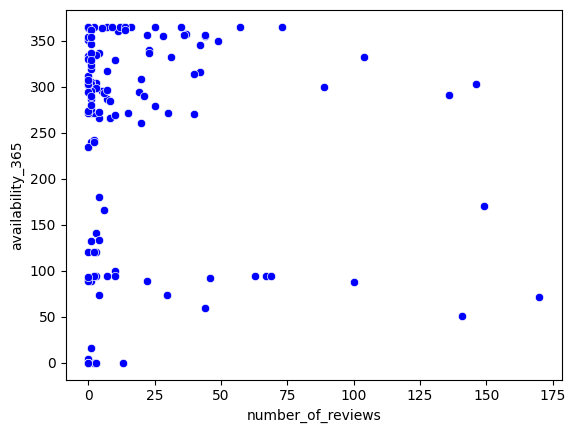

In [526]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión

sns.scatterplot(x='number_of_reviews', y='availability_365', color="blue", data=df_hotel)

In [527]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_hotel[['number_of_reviews']]
Var_Dep= df_hotel['availability_365']

In [528]:
#Se define model como la función de regresión lineal
model= LinearRegression()

In [529]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [530]:
#Predecimos los valores
y_pred= model.predict(X=df_hotel[['number_of_reviews']])

In [531]:
#Insertamos la columna de predicciones en el DataFrame
df_hotel.insert(0, 'Predicciones_5', y_pred)

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

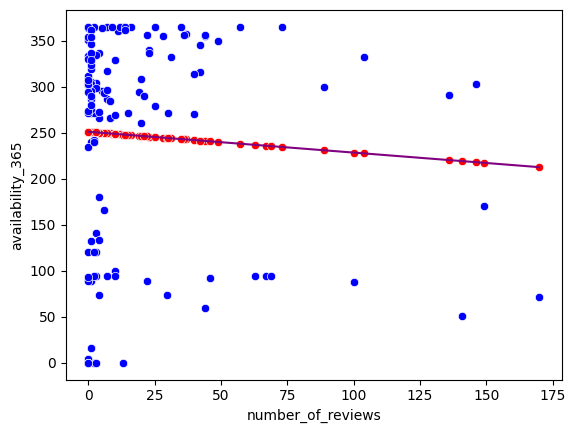

In [532]:
#Visualizamos la gráfica comparativa entre el real y el predecido

sns.scatterplot(x='number_of_reviews', y='availability_365', color="blue", data=df_hotel)
sns.scatterplot(x='number_of_reviews', y='Predicciones_5', color="red", data=df_hotel)
sns.lineplot(x='number_of_reviews', y='Predicciones_5', color="purple", data=df_hotel)

In [533]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
determinacion.append(coef_Deter)
coef_Deter

0.004221281227133944

In [534]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
correlacion.append(coef_Correl)
coef_Correl

0.06497138775748863

####reviews_per_month vs review_scores_communication

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

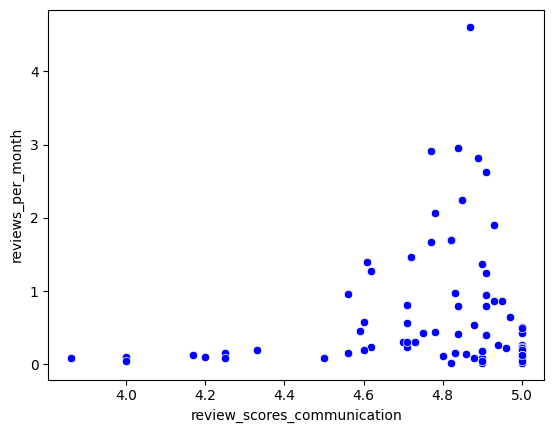

In [535]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión

sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="blue", data=df_hotel)

In [536]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_hotel[['review_scores_communication']]
Var_Dep= df_hotel['reviews_per_month']

In [537]:
#Se define model como la función de regresión lineal
model= LinearRegression()

In [538]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [539]:
#Predecimos los valores
y_pred= model.predict(X=df_hotel[['review_scores_communication']])

In [540]:
#Insertamos la columna de predicciones en el DataFrame
df_hotel.insert(0, 'Predicciones_6', y_pred)

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

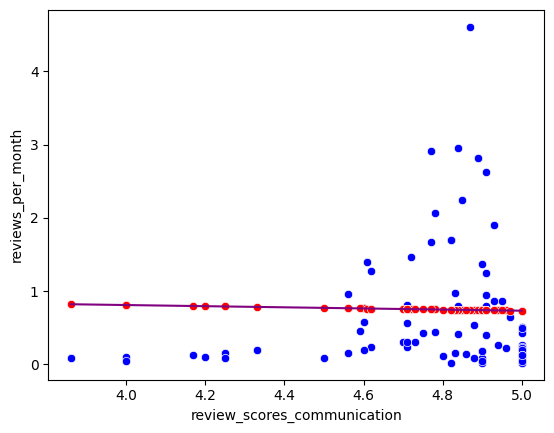

In [541]:
#Visualizamos la gráfica comparativa entre el real y el predecido

sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="blue", data=df_hotel)
sns.scatterplot(x='review_scores_communication', y='Predicciones_6', color="red", data=df_hotel)
sns.lineplot(x='review_scores_communication', y='Predicciones_6', color="purple", data=df_hotel)

In [542]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
determinacion.append(coef_Deter)
coef_Deter

0.00040676221159796633

In [543]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
correlacion.append(coef_Correl)
coef_Correl

0.020168346774040908

###Modelo matematico para numero de reseñas

In [544]:
# Calcular la matriz de correlación
correlation_matrix = df_hotel.corrwith(df_hotel['number_of_reviews'])

# Imprimir la matriz de correlación
print(correlation_matrix)

Predicciones_6                 0.001255
Predicciones_5                -1.000000
Predicciones_4                -0.030182
Predicciones_3                 1.000000
Predicciones_2                 0.167441
Predicciones_1                 0.114864
host_response_rate             0.114864
host_acceptance_rate           0.234408
host_is_superhost              0.206454
host_identity_verified              NaN
accommodates                  -0.157684
bathrooms_text                -0.114655
bedrooms                      -0.035218
beds                          -0.143053
price                         -0.167441
minimum_nights_avg_ntm         0.042642
maximum_nights_avg_ntm         0.295049
availability_30                0.051358
availability_60                0.100747
availability_90                0.111650
availability_365              -0.064971
number_of_reviews              1.000000
number_of_reviews_ltm          0.896208
number_of_reviews_l30d         0.667473
review_scores_rating           0.106729


<ipython-input-544-baf331b077bd>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_hotel.corrwith(df_hotel['number_of_reviews'])


####number_of_reviews vs number_of_reviews_ltm

<Axes: xlabel='number_of_reviews_ltm', ylabel='number_of_reviews'>

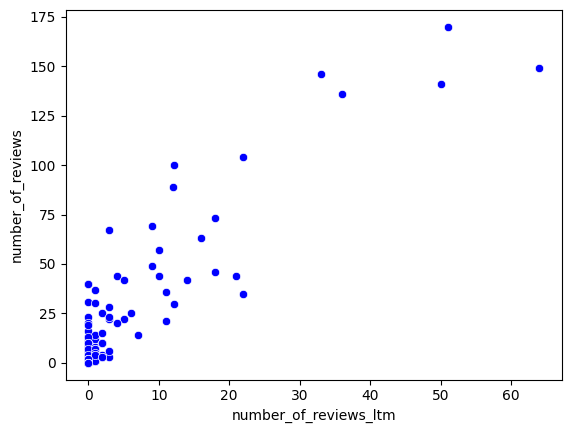

In [545]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión

sns.scatterplot(x='number_of_reviews_ltm', y='number_of_reviews', color="blue", data=df_hotel)

In [546]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_hotel[['number_of_reviews_ltm']]
Var_Dep= df_hotel['number_of_reviews']

In [547]:
#Se define model como la función de regresión lineal
model= LinearRegression()

In [548]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [549]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_ltm'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([2.97134998]),
 'rank_': 1,
 'singular_': array([114.35236674]),
 'intercept_': 7.053249533076473}

**MODELO : y = 2.97134998x + 7.7.053249533076473**

In [550]:
#Predecimos los valores
y_pred= model.predict(X=df_hotel[['number_of_reviews_ltm']])

In [551]:
#Insertamos la columna de predicciones en el DataFrame
df_hotel.insert(0, 'Predicciones_7', y_pred)

<Axes: xlabel='number_of_reviews_ltm', ylabel='number_of_reviews'>

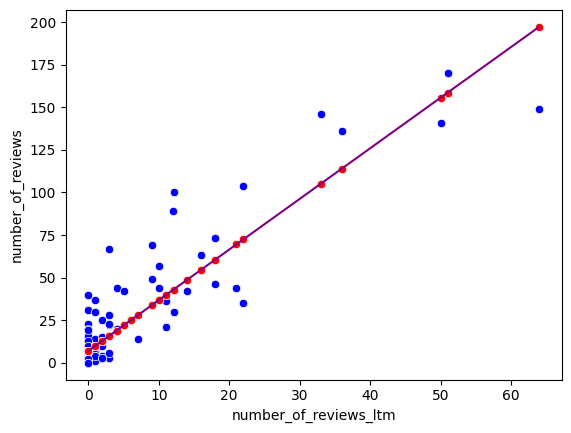

In [552]:
#Visualizamos la gráfica comparativa entre el real y el predecido

sns.scatterplot(x='number_of_reviews_ltm', y='number_of_reviews', color="blue", data=df_hotel)
sns.scatterplot(x='number_of_reviews_ltm', y='Predicciones_7', color="red", data=df_hotel)
sns.lineplot(x='number_of_reviews_ltm', y='Predicciones_7', color="purple", data=df_hotel)

In [553]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
determinacion.append(coef_Deter)
coef_Deter

0.8031888980995782

In [554]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
correlacion.append(coef_Correl)
coef_Correl

0.8962080662991034

###Tablas de determinacion y correlacion

In [555]:
variables = ['host_acceptance_rate vs host_response_rate',
                       'host_acceptance_rate vs price'
                       ,'host_acceptance_rate vs number_of_reviews'
                       ,'review_scores_location vs review_scores_cleanliness'
                       ,'availability_365 vs number_of_reviews'
                       ,'reviews_per_month vs review_scores_communication'
                       ,'number_of_reviews vs number_of_reviews_ltm']
modelo = pd.Series(variables)
correl = pd.Series(correlacion)
deter = pd.Series(determinacion)

In [556]:
coef = pd.DataFrame({'Modelo': modelo, 'Determinacion': deter, 'Correlacion': correl})
coef

,Modelo,Determinacion,Correlacion
0,host_acceptance_rate vs host_response_rate,0.486428,0.697444
1,host_acceptance_rate vs price,0.069979,0.264535
2,host_acceptance_rate vs number_of_reviews,0.054947,0.234408
3,review_scores_location vs review_scores_cleanl...,0.174625,0.417882
4,availability_365 vs number_of_reviews,0.004221,0.064971
5,reviews_per_month vs review_scores_communication,0.000407,0.020168
6,number_of_reviews vs number_of_reviews_ltm,0.803189,0.896208


In [557]:
#Convertir DataFrame a CSV
coef.to_csv("Habitaciones_hotel_coeficientes.csv")

#descargar archivo filtrado en csv
from google.colab import files


files.download("Habitaciones_hotel_coeficientes.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>